In [1]:
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

# Problem Parameters
a = 0.
b = 1.


def exact(*x):
    return np.prod(np.sin(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2) * exact(*x)


def g(*x):
    return np.zeros_like(x[0])

In [2]:
# Parameters
d = 2
k = 2
deltas = np.arange(0.2, 2.1, 0.1)
N = 10

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)

L = lambda func: lambda *x: - func.laplacian(*x)
B = lambda func: lambda *x: func(*x)
    
Lidx = lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0)
Bidx = lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0)
    

# Integration
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Data collection
results = np.zeros((np.size(deltas), 3))

for i, delta in enumerate(deltas):
    # Solve for approximate solution
    phi = rad.Wendland(d, k, delta, xc)
    solver = rad.solve.CollocationSolver(phi, L, Lidx, B, Bidx)
    approx = solver.solve(f, g)
    error = rad.error(exact, approx, error_integrator)
    cond = solver.cond()
    bw = np.max(solver.bandwidth())
    
    results[i,0] = error
    results[i, 1] = cond
    results[i, 2] = bw
    
    print("Delta:", delta)
    print("  L2 Error:", error)
    print("  Condition Number:", cond)
    print("  Bandwidth:", bw)

Delta: 0.2
  L2 Error: 0.6124258360873756
  Condition Number: 6077.877810935134
  Bandwidth: 11
Delta: 0.30000000000000004
  L2 Error: 0.9578113830041557
  Condition Number: 20263.778898182965
  Bandwidth: 21
Delta: 0.4000000000000001
  L2 Error: 3.7047337780198872
  Condition Number: 1555.94901233556
  Bandwidth: 31
Delta: 0.5000000000000001
  L2 Error: 0.48090716659619825
  Condition Number: 4671.928644651275
  Bandwidth: 42
Delta: 0.6000000000000001
  L2 Error: 0.24192391397719856
  Condition Number: 12262.933282989938
  Bandwidth: 52
Delta: 0.7000000000000002
  L2 Error: 0.26715791578776565
  Condition Number: 28133.00236344607
  Bandwidth: 61
Delta: 0.8000000000000003
  L2 Error: 9.066555079716952
  Condition Number: 124863.5298886223
  Bandwidth: 71
Delta: 0.9000000000000001
  L2 Error: 0.25099781219855205
  Condition Number: 98512.99394302486
  Bandwidth: 81
Delta: 1.0000000000000002
  L2 Error: 0.22304454027133605
  Condition Number: 166251.3720443044
  Bandwidth: 90
Delta: 1.1

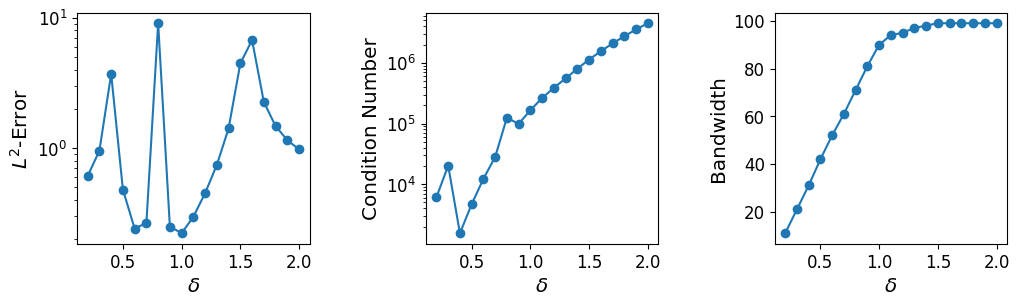

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))

axs[0].set_xlabel(r"$\delta$")
axs[0].set_ylabel(r"$L^{2}$-Error")
axs[0].set_yscale('log')
axs[0].plot(deltas, results[:, 0], 'o-')

axs[1].set_xlabel(r"$\delta$")
axs[1].set_ylabel(r"Condition Number")
axs[1].set_yscale('log')
axs[1].plot(deltas, results[:, 1], 'o-')

axs[2].set_xlabel(r"$\delta$")
axs[2].set_ylabel(r"Bandwidth")
axs[2].plot(deltas, results[:, 2], 'o-')

plt.subplots_adjust(wspace=0.5)
plt.savefig("figures/kansa/deltas.pdf", bbox_inches='tight')

In [5]:
np.shape(results)[0]

19